In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Industries'), 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-05 - 62


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

21


,len,mean,std,shrp,drawdown
Symbols,,,,,
XLU,32,2.821584,1.436957,1.847597,3.237646
VPU,32,2.697686,1.411803,1.792756,3.258989
XAR,32,3.435906,2.284770,1.430883,2.579733
EMLP,32,1.651669,1.143644,1.298483,2.697335
GDX,32,11.531044,9.068685,1.253145,6.075660
IGF,32,2.705110,2.165129,1.172421,2.242252
FXU,32,1.923387,1.530282,1.147972,4.221547
IHI,32,4.854835,4.190734,1.118698,4.510425
IXJ,32,3.081993,2.679960,1.087824,3.337207


evicted IGF 0.9417006496548505
evicted IXJ 0.9493103050292875
evicted XLB 0.9047460145915619
evicted XLP 0.848788821870409
evicted FXU 0.788058195097979
evicted EMLP 0.6795241843945657
evicted IHI 0.8687240655409009
retry backlogs ['IYH', 'VPU', 'ITA', 'VHT', 'XLV', 'GDXJ', 'VDC', 'VAW', 'IYF', 'FXH', 'FHLC'] at 0.96
evicted IYF 0.9593552158835663
evicted VAW 0.870331057965218
evicted VDC 0.8990043838746047
evicted VHT 0.8753185895372821
retry backlogs ['IYH', 'VPU', 'FHLC', 'ITA', 'XLV', 'GDXJ', 'FXH'] at 0.97
evicted XLV 0.8617131399430735
retry backlogs ['IYH', 'VPU', 'FHLC', 'ITA', 'FXH', 'GDXJ'] at 0.98
evicted ITA 0.9798949585283643
evicted FHLC 0.8728868192485695
retry backlogs ['VPU', 'IYH', 'FXH', 'GDXJ'] at 0.99
evicted FXH 0.982374873471283
evicted IYH 0.871367119588283
retry backlogs ['VPU', 'GDXJ'] at 1.0
evicted VPU 0.9952192679607437
evicted GDXJ 0.9907889883075983
{'GDX': 0.06, 'XAR': 0.11, 'XLU': 0.84}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,3.386328,1.585550,-1.019780,2.686028,3.863545,4.589827,5.548532,2.030627,2.546418
XLU,32.0,2.821584,1.436957,-1.243403,2.048038,3.122155,3.700592,5.349945,1.847597,3.237646
XAR,32.0,3.435906,2.284770,-0.832044,1.147557,3.970139,5.045070,7.514941,1.430883,2.579733
GDX,32.0,11.531044,9.068685,-4.131452,8.577849,11.641945,14.592332,28.033265,1.253145,6.075660


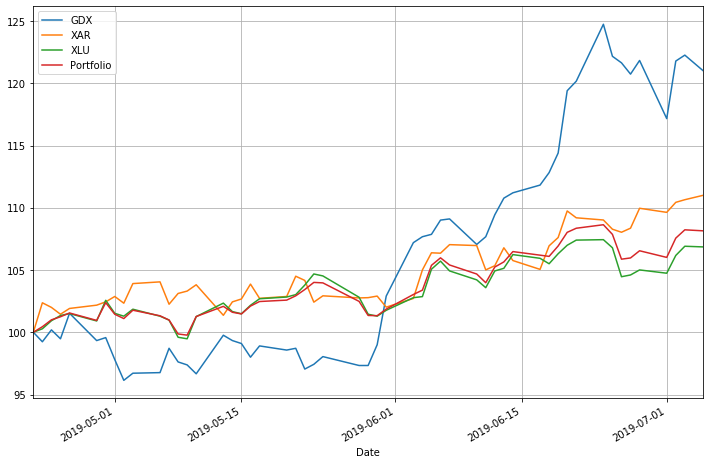

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)